# 텍스트를 이용한 인공신경망
- speech to text  : 음성 변환

#### 순차데이터 
- 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터

#### 순환 신경망 ( Recurrent neural network, RNN )
- 타입스텝 : 샘플을 처리하는 한 단계
- 타임스텝이 오래될수록 순환되는 정보는 희미해짐
- 셀
- 은닉상태 : 셀의 출력
- RNN의 activation funtion은 주로 tanh 함수 * 시그모이드는 0~1, tanh은 -1~1

#### RNN의 가중치
- Wx : 입력에 곱해지는 가중치
- Wh : hidden State에 곱해지는 가중치
- 절편도 있지만 여기서는 표시안함

#### 셀의 가중치와 입력
- 입력 특성 4개, 순환층 뉴런 3개
- 한 뉴런의 hidden state는 다음 timestep에 재사용될 때, 자기자신을 포함한 다른 뉴런에도 모두 전달된다.
- Wx의 개수 : 4 * 3, Wh의 개수 3 * 3
- 모델 파라미터 수 : 12 + 9 + 3 = 24

- 샘플을 하나의 시퀀스라고 함 
- 순환층이 여러 개 쌓일때는 ? : 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉상태를 출력
- 출력층의 구성 : dense layer를 구성하여 클래스를 분류

- IMDB : Internet Movie DataBase
- 텍스트 데이터 : 단어를 숫자로 바꿈. 단어마다 고유한 정수를 부여함
- 토큰 : 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리. 간단한 문제에서는 단어와 같게 봐도 무방
- 1개의 토큰이  하나의 타임스템프
- 토큰에서 예약된 정수 : 0 패딩 / 1 문장의 시작 / 2 어휘사전에 없는 토큰 ( 어휘사전 : 훈련세트에서 고유한 단어를 뽑아 만든 목록 )

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
# load_data(num_words=500) : 자주 등장하는 단어 500개만 사용

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])
#부정 : 0, 긍정 : 1

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


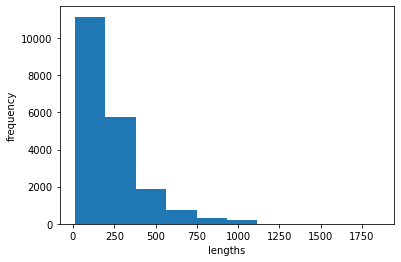

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

#최대 길이를 100으로 맞춤
# 샘플 앞부분을 자른다.

In [12]:
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [17]:
val_seq = pad_sequences(val_input, maxlen=100)
# 최대 길이 100, 앞부분을 자름

In [19]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500))) # 데이터를 불러올 떄 num_word 500으로 설정
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [20]:
train_oh = keras.utils.to_categorical(train_seq) # 범주형 변수로 바꿈 one_hot 인코딩

In [22]:
print(train_oh.shape)

(20000, 100, 500)


In [23]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [25]:
print(np.sum(train_oh[0][0]))

1.0


In [26]:
val_oh = keras.utils.to_categorical(val_seq)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplearnn-model.h5')
early_stopping_cb =  keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh,train_target,epochs=5,batch_size=64,validation_data=(val_oh,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/5
313/313 [==============================] - 17s 50ms/step - loss: 1.0724 - accuracy: 0.5006 - val_loss: 0.7167 - val_accuracy: 0.4874
Epoch 2/5
313/313 [==============================] - 16s 51ms/step - loss: 1.0412 - accuracy: 0.5045 - val_loss: 0.8350 - val_accuracy: 0.5126
Epoch 3/5
313/313 [==============================] - 17s 54ms/step - loss: 1.0456 - accuracy: 0.5015 - val_loss: 0.7660 - val_accuracy: 0.5126
Epoch 4/5
313/313 [==============================] - 15s 49ms/step - loss: 1.0487 - accuracy: 0.5003 - val_loss: 0.7721 - val_accuracy: 0.5126


#### 임베딩 : 각 단어를 고정된 크기의 실수 벡터로 바꿔줌 , 원핫인코딩보다 훨씬 의미 있는 값으로 채워짐

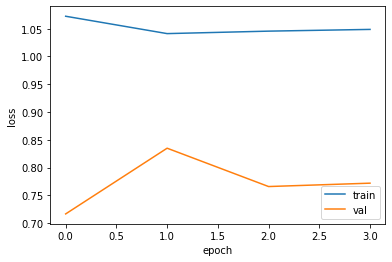

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()